This ipython file is the project by Hongyi Tang and Weijian Li for course 12752.
There are four ipython files in the project in total. Each file consist of one cluster analysis task.
In this file, the cluster analysis is demonstrated to 5 building types.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

%matplotlib inline

Please download the dataset and change the file path.

In [2]:
# Read in CBECS data
f = open('C:/F16-12-752-master/projects/thongyi_weijian1/data/CBECS.csv')
data = pd.read_csv(f,sep=',', header='infer', parse_dates=[1])
#data = pd.DataFrame.from_csv('../../lectures/data/CBECS.csv') 
data = data.set_index('PUBID')
data.tail()

,REGION,CENDIV,PBA,FREESTN,SQFT,SQFTC,WLCNS,RFCNS,RFCOOL,RFTILT,...,FKCLBTU,FKWTBTU,FKCKBTU,FKOTBTU,DHHTBTU,DHCLBTU,DHWTBTU,DHCKBTU,DHOTBTU,PUBCLIM
PUBID,,,,,,,,,,,,,,,,,,,,,
6716,3,5,14,1.0,108000,7,1,6,2,1,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2
6717,3,7,5,1.0,1700,2,5,5,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
6718,2,3,26,1.0,2000,2,1,4,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
6719,1,2,12,1.0,19250,4,1,4,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
6720,3,5,14,1.0,142000,7,1,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


Office, inpatient health care, service, public assembly and education buildings are selected.

In [74]:
energydata=pd.DataFrame()

type_B=[2,16,26,13,14] # office, inpatient health care, service, public assembly and education
type_C=[1,3,4,5,6,7,8,9,10,11,12,15,17,18,19,20,21,22,23,24,25,91]

data_type=data
data_type=data_type[data_type.NGUSED!=2]

for i in type_C:
    data_type=data_type[data_type.PBA!=i]

energydata['Building Type']=data_type.PBA

index=['ELBTU','NGBTU','ELVNBTU','NGHTBTU']
for i in index:
    energydata[i]=data_type[i]/data_type.SQFT
energydata

,Building Type,ELBTU,NGBTU,ELVNBTU,NGHTBTU
PUBID,,,,,
7,16,111.653990,51.838735,23.739538,0.000000
9,2,59.424400,19.931467,17.621520,16.893707
10,2,91.791085,0.222767,21.699827,0.000000
11,2,42.062146,20.280000,18.361463,19.146244
13,26,34.994000,6.896857,2.202000,6.896857
15,14,62.133773,17.110851,4.380262,9.513459
16,14,44.434808,35.471904,4.091010,25.715029
18,2,10.216667,8.183000,2.971167,8.183000
20,2,37.380282,22.818521,14.557141,21.278775


In [75]:
energydata = energydata.dropna(how='any')
energydata = energydata[~(energydata == 0).any(axis=1)]
PBA1=energydata['Building Type'].unique()
PBA1
count=[]
for i in PBA1:
    count.append([energydata[energydata['Building Type']==i].shape[0],i])
count

[[714, 2], [244, 26], [471, 14], [226, 13], [283, 16]]

C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


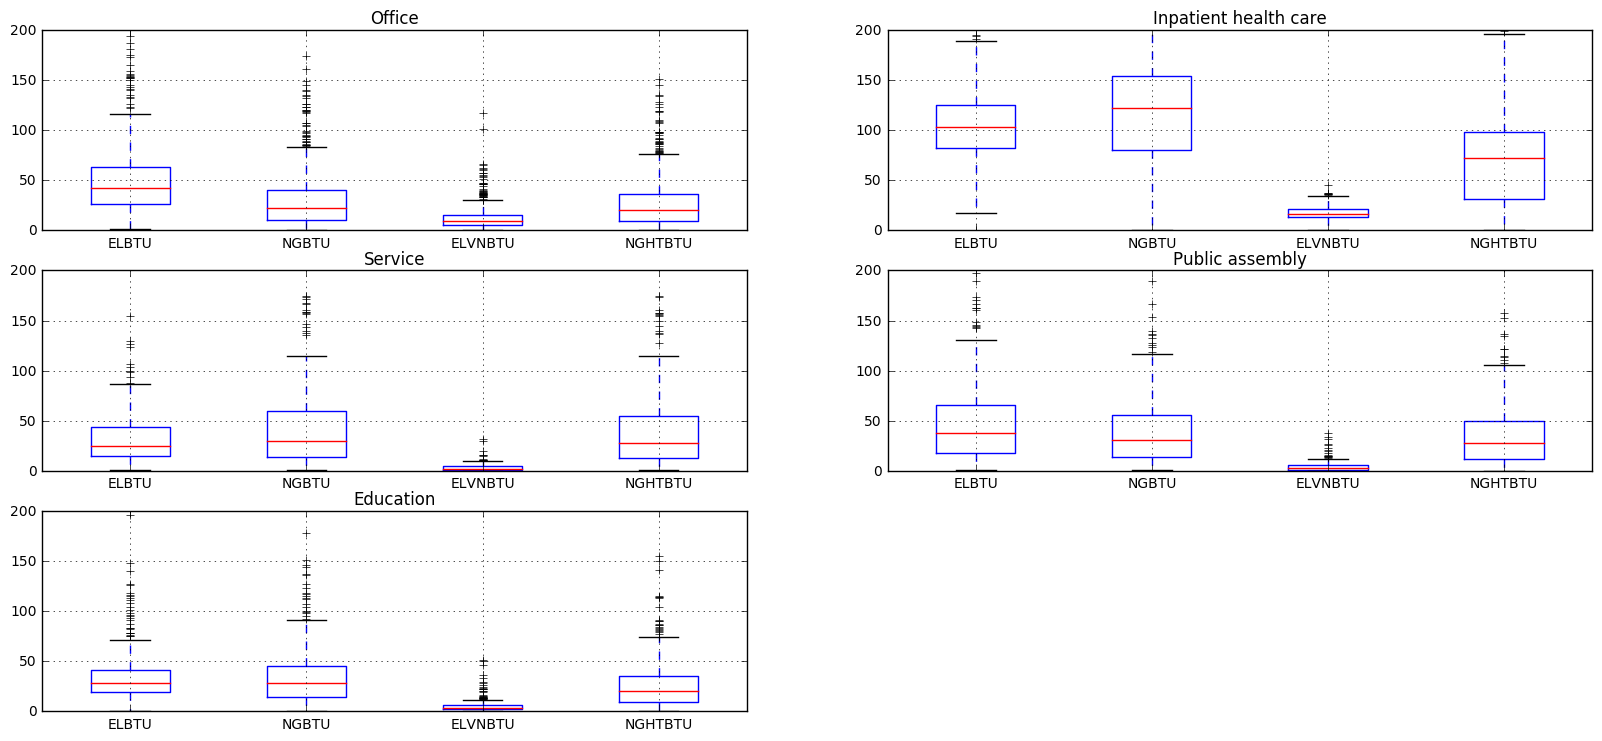

In [91]:
type_C=['Office','Inpatient health care','Service','Public assembly','Education']
fig1 = plt.figure(figsize=(20,15))
times=1
data_seperate=[]
# energydata[energydata['Building Type']==type_B[1]]
for i in range(len(type_B)):
    x=energydata[energydata['Building Type']==type_B[i]]
    x=x.drop(x.columns[0],axis=1)
    data_seperate.append(x)
for i in range(len(type_B)):
    plt.subplot(len(type_B),2,times)
    data_seperate[i].boxplot()
    times=times+1
    plt.title(type_C[i])
    plt.ylim(0,200)

1257
168
198
302
13


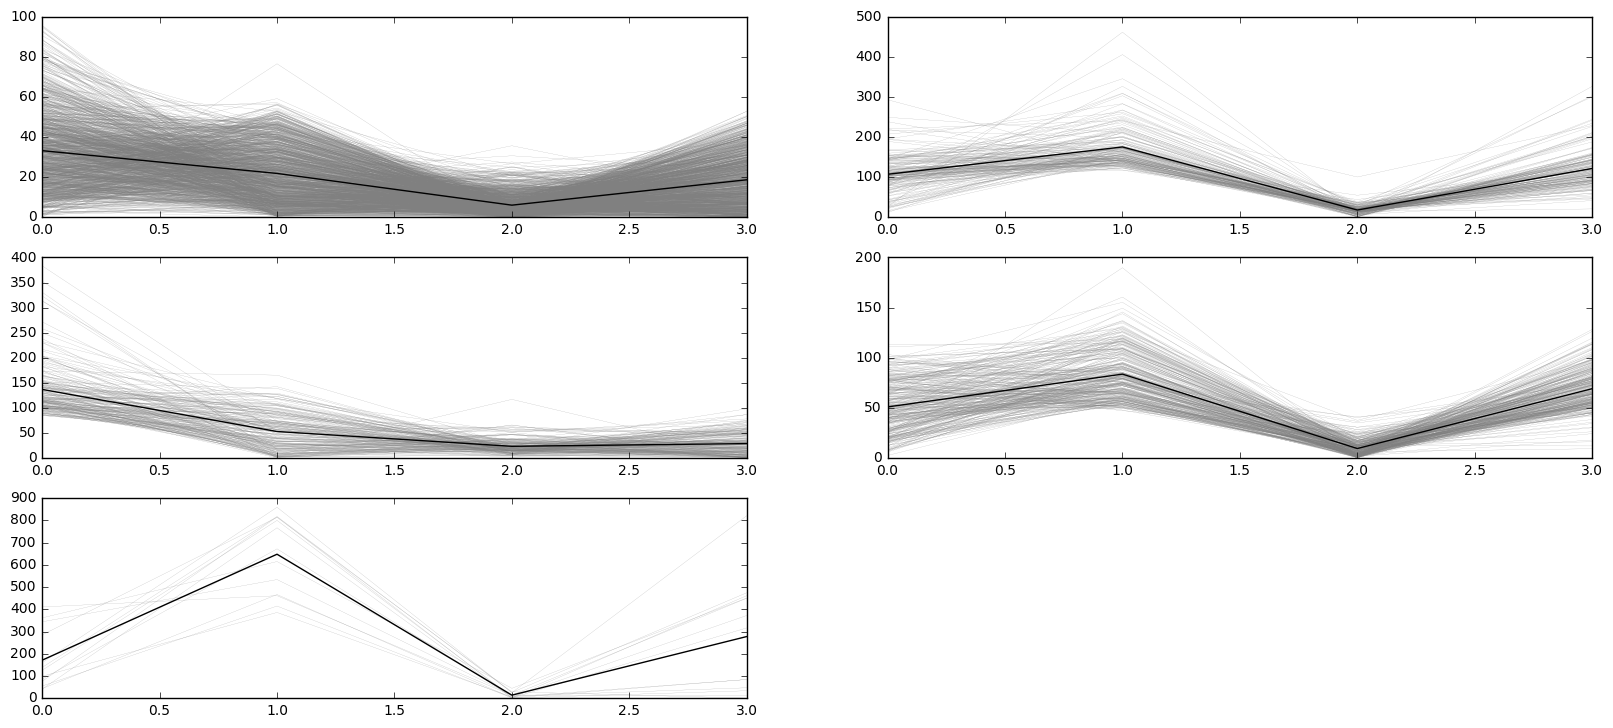

In [80]:
y=pd.DataFrame()
for i in range(len(type_B)):
    y=y.append(data_seperate[i])
X=y.as_matrix().astype(np.float32)
from sklearn.cluster import KMeans
num_clust = 5
clusters = KMeans(n_clusters=num_clust).fit(X)
cluster_assignments = clusters.predict(X)
# plt.subplot(num_clust+1,1,1)
# plt.plot(cluster_assignments[:150])
# plt.ylim([0.2,1.1])
fig2 = plt.figure(figsize=(20,15))
for cluster_id in range(len(clusters.cluster_centers_)):
    plt.subplot(num_clust,2,cluster_id+1)
    cluster_members = X[cluster_assignments==cluster_id,:]
    print(len(cluster_members))
    for i in range(len(cluster_members)):
        plt.plot(cluster_members[i,:], color='grey', lw='0.1')
    plt.plot(clusters.cluster_centers_[cluster_id,:], color='k', lw='1')

In [81]:
# plot stem figure to see the partten and outlier
y['assignment']=cluster_assignments
y=y[y.assignment!=4]
del y['assignment']
X=y.as_matrix().astype(np.float32)

1118
208
372
192
35


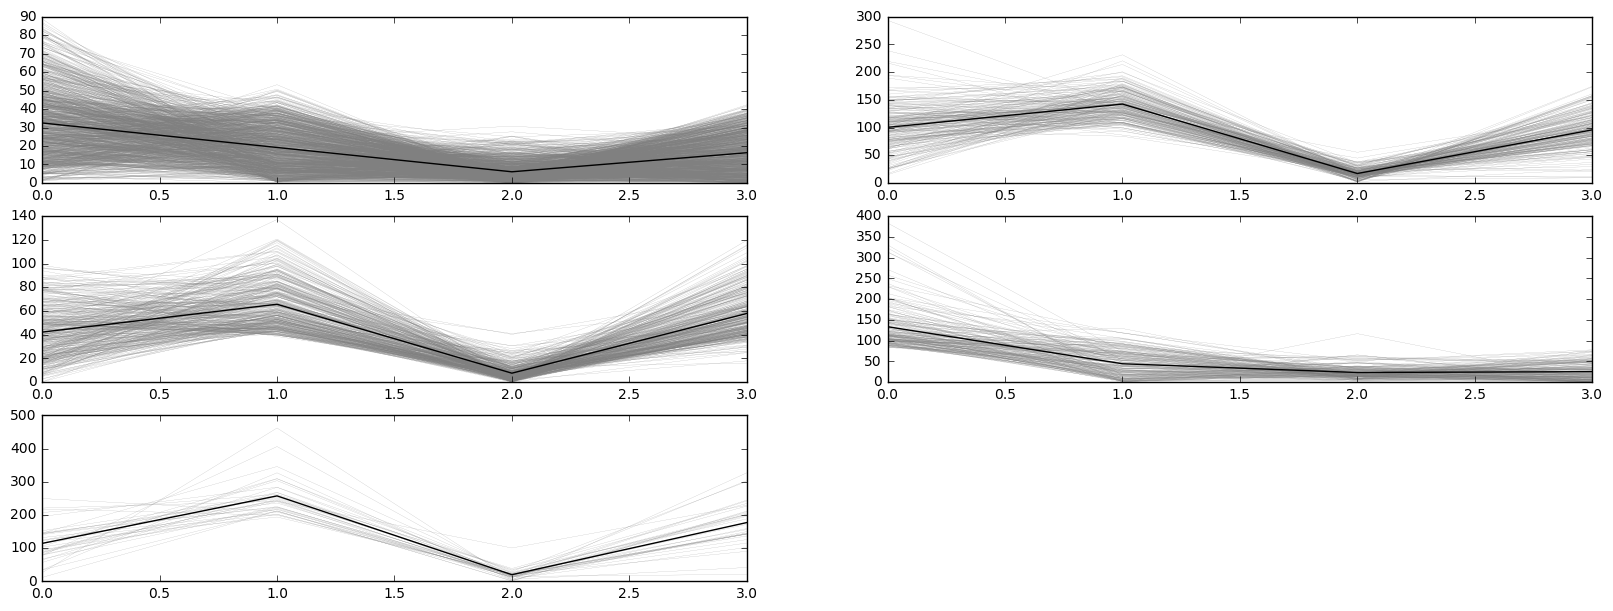

In [82]:
num_clust = 5
clusters = KMeans(n_clusters=num_clust).fit(X)
cluster_assignments = clusters.predict(X)
# plt.subplot(num_clust+1,1,1)
# plt.plot(cluster_assignments[:150])
# plt.ylim([0.2,1.1])
fig2 = plt.figure(figsize=(20,15))
for cluster_id in range(len(clusters.cluster_centers_)):
    plt.subplot(num_clust+1,2,cluster_id+1)
    cluster_members = X[cluster_assignments==cluster_id,:]
    print(len(cluster_members))
    for i in range(len(cluster_members)):
        plt.plot(cluster_members[i,:], color='grey', lw='0.1')
    plt.plot(clusters.cluster_centers_[cluster_id,:], color='k', lw='1')

In [83]:
# plot stem figure to see the partten and outlier
y['assignment']=cluster_assignments
y=y[y.assignment!=4]
del y['assignment']
X=y.as_matrix().astype(np.float32)

1084
204
41
214
347


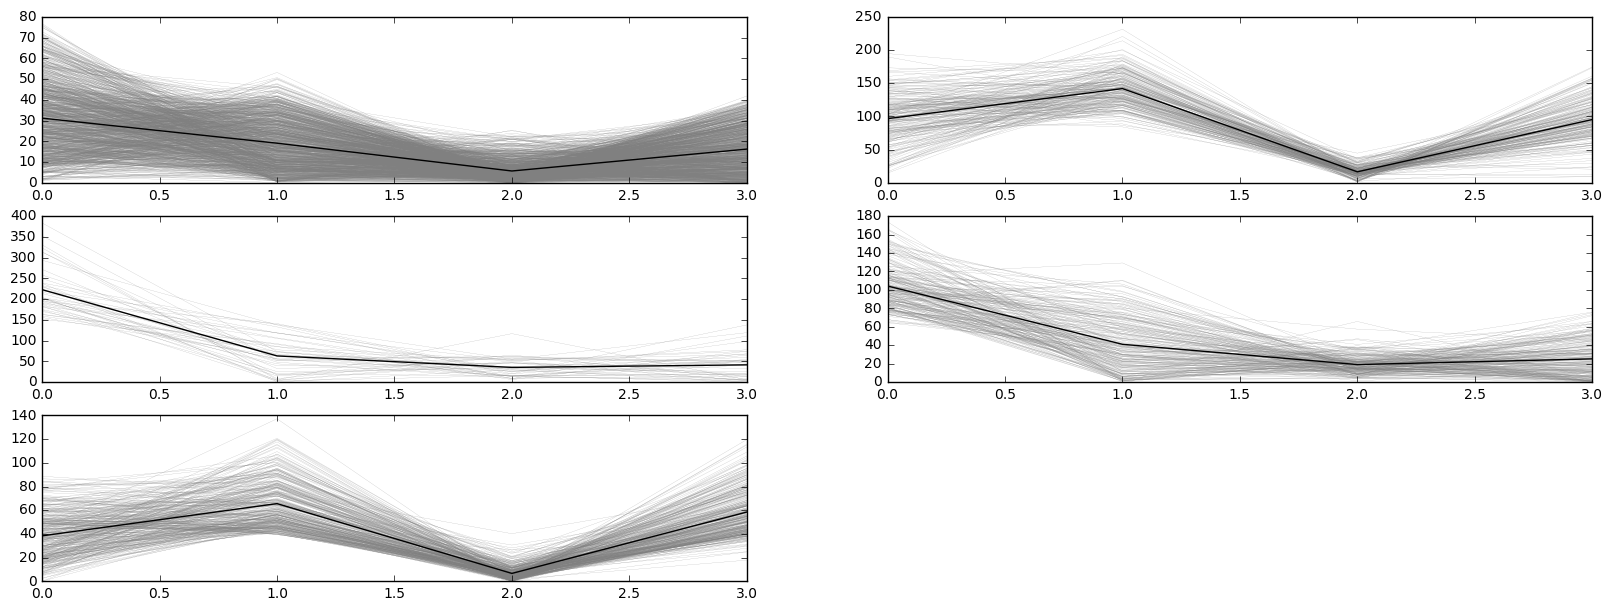

In [84]:
num_clust = 5
clusters = KMeans(n_clusters=num_clust).fit(X)
cluster_assignments = clusters.predict(X)
# plt.subplot(num_clust+1,1,1)
# plt.plot(cluster_assignments[:150])
# plt.ylim([0.2,1.1])
fig2 = plt.figure(figsize=(20,15))
for cluster_id in range(len(clusters.cluster_centers_)):
    plt.subplot(num_clust+1,2,cluster_id+1)
    cluster_members = X[cluster_assignments==cluster_id,:]
    print(len(cluster_members))
    for i in range(len(cluster_members)):
        plt.plot(cluster_members[i,:], color='grey', lw='0.1')
    plt.plot(clusters.cluster_centers_[cluster_id,:], color='k', lw='1')

In [85]:
# plot stem figure to see the partten and outlier
y['assignment']=cluster_assignments
y=y[y.assignment!=2]
del y['assignment']
X=y.as_matrix().astype(np.float32)

854
165
477
140
213


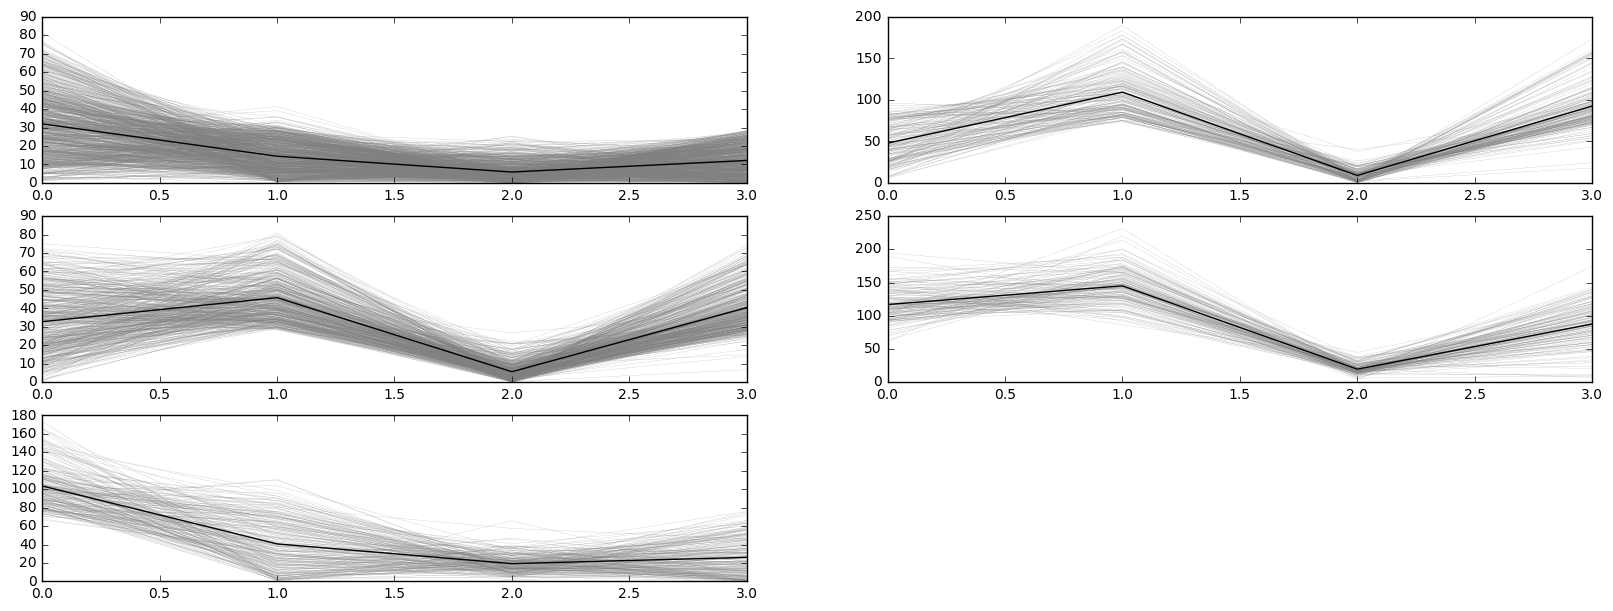

In [86]:
num_clust = 5
clusters = KMeans(n_clusters=num_clust).fit(X)
cluster_assignments = clusters.predict(X)
# plt.subplot(num_clust+1,1,1)
# plt.plot(cluster_assignments[:150])
# plt.ylim([0.2,1.1])
fig2 = plt.figure(figsize=(20,15))
for cluster_id in range(len(clusters.cluster_centers_)):
    plt.subplot(num_clust+1,2,cluster_id+1)
    cluster_members = X[cluster_assignments==cluster_id,:]
    print(len(cluster_members))
    for i in range(len(cluster_members)):
        plt.plot(cluster_members[i,:], color='grey', lw='0.1')
    plt.plot(clusters.cluster_centers_[cluster_id,:], color='k', lw='1')

The connection between assignment and building type need to be found by visually judging. The connecting can be different every time the file was run.

In [87]:
y['assignment']=cluster_assignments
y=y.join(data['PBA'],how='inner')
y
y['judge']=1
y['judge'].iloc[np.where(np.array(y.PBA)==2)]=0
y['judge'].iloc[np.where(np.array(y.PBA)==16)]=3
y['judge'].iloc[np.where(np.array(y.PBA)==26)]=1
y['judge'].iloc[np.where(np.array(y.PBA)==13)]=4
y['judge'].iloc[np.where(np.array(y.PBA)==14)]=2
y[y['judge']==y['assignment']].count()


C:\Users\Daniel\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


ELBTU         727
NGBTU         727
ELVNBTU       727
NGHTBTU       727
assignment    727
PBA           727
judge         727
dtype: int64

In [88]:
a=727/(714+283+244+226+471)

In [89]:
a

0.3751289989680083